In [3]:
import numpy
from matplotlib import pyplot

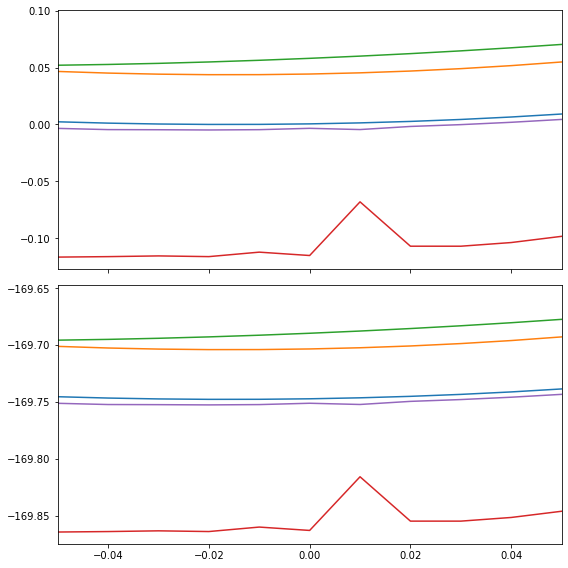

In [16]:
data = numpy.loadtxt("./data/r_1.4000.dat", delimiter=",")

fig, axs = pyplot.subplots(2, 1, sharex=True, figsize=(8, 8))

ax = axs[0]
ax.plot(data[:, 0], data[:, 1] - data[:, 1].min(), label="RHF")
ax.plot(data[:, 0], data[:, 2] - data[:, 1].min(), label="UHF0")
ax.plot(data[:, 0], data[:, 3] - data[:, 1].min(), label="UHF1")
ax.plot(data[:, 0], data[:, 4] - data[:, 1].min(), label="CASSCF")
ax.plot(data[:, 0], data[:, 5] - data[:, 1].min(), label="CASCI")

ax = axs[1]
ax.plot(data[:, 0], data[:, 1] - data[:, 1].min())
ax.plot(data[:, 0], data[:, 2])
ax.plot(data[:, 0], data[:, 3])
ax.plot(data[:, 0], data[:, 4])
ax.plot(data[:, 0], data[:, 5])

ax.set_xlim(-0.05, 0.05)
fig.tight_layout()

In [6]:
data.shape

(21, 6)